In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
# 범죄 데이터 읽기
# 컬럼명 변경 : 기존컬럼 -> ["자치구", "발생합계", "검거합계", "살인발생", "살인검거", 
#                           "강도발생", "강도검거", "강간발생", "강간검거", 
#                           "절도발생", "절도검거", "폭력발생", "폭력검거"]
# 자치구 컬럼을 index로 변경
# (살인, 강도, 강간, 절도, 폭력) 검거율 컬럼 만들기
# ~검거 컬럼 제거
# 소계 행 제거
# ~발생 -> ~ 으로 변경 (발생 단어 제거 : 살인발생 -> 살인)
# 각 범죄가 가장 많은 자치구 확인
# 검거율 높은 자치구 확인
# 각 컬럼의 값을 0 ~ 1 사이의 값으로 변경 ( scale 변경 )
# 파일 저장 : processed-seoul-crime.csv

# processed-seoul-crime과 processed-seoul-cctv를 읽어서 병합
# 상관관계 확인

In [3]:
seoul_crime = pd.read_csv("data-files/seoul-crime.csv")
seoul_crime.head()

,자치구별(2),발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
1,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
2,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
3,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
4,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926


In [4]:
column_names = ["자치구", "발생합계", "검거합계", "살인발생", "살인검거", 
                "강도발생", "강도검거", "강간발생", "강간검거", 
                "절도발생", "절도검거", "폭력발생", "폭력검거"]

# 컬럼 이름 변경 1 (전체 변경)
# renamed_seoul_crime = seoul_crim.copy()
# renamed_seoul_crime.columns = column_names


# 컬럼 이름 변경 2 (전체 또는 부분 변경)
rename_map = { p:n for p, n in zip(seoul_crime.columns, column_names) }
renamed_seoul_crime = seoul_crime.rename(columns=rename_map)

In [5]:
renamed_seoul_crime.head()

,자치구,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
1,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
2,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
3,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
4,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926


In [6]:
# 자치구를 인덱스로 전환
renamed_seoul_crime.set_index(["자치구"], inplace=True)
renamed_seoul_crime.head()

,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
자치구,,,,,,,,,,,,
소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926


In [12]:
# 검거율 컬럼 만들기 1

for idx in np.arange(2, 12, 2):
    # print(renamed_seoul_crime.columns[idx], renamed_seoul_crime.columns[idx+1])
    cols = renamed_seoul_crime.columns
    col = f"{cols[idx][:2]}검거율" # "살인검거율", "강도검거율", ...
    renamed_seoul_crime[col] = \
        renamed_seoul_crime[cols[idx+1]] / renamed_seoul_crime[cols[idx]]

In [17]:
cols = renamed_seoul_crime.columns
cols[3:13:2]

Index(['살인검거', '강도검거', '강간검거', '절도검거', '폭력검거'], dtype='object')

In [18]:
# 검거율 컬럼 만들기 2
cols = renamed_seoul_crime.columns
for c1, c2 in zip(cols[2:12:2], cols[3:13:2]):
    col = f"{c1[:2]}검거율" # "살인검거율", "강도검거율", ...
    renamed_seoul_crime[col] = \
        renamed_seoul_crime[c2] / renamed_seoul_crime[c1]

In [19]:
renamed_seoul_crime.head()

,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,,,,,,
소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388,0.903226,0.95082,0.905315,0.535326,0.847475
종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248,0.500000,1.00000,4.852564,0.688601,0.850716
중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224,1.000000,1.00000,0.602484,0.577795,0.868701
용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069,0.666667,1.00000,0.730496,0.512169,0.828040
성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926,1.333333,0.25000,0.745455,0.549171,0.849541


In [20]:
# ~검거 컬럼 제거
dropped_seoul_crime = renamed_seoul_crime.drop(cols[3:13:2], axis=1)
dropped_seoul_crime.head()

,발생합계,검거합계,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,
소계,80445,58012,124,122,4911,33531,41757,0.903226,0.95082,0.905315,0.535326,0.847475
종로구,2712,2755,6,4,156,1079,1467,0.500000,1.00000,4.852564,0.688601,0.850716
중구,2861,2072,6,6,161,1279,1409,1.000000,1.00000,0.602484,0.577795,0.868701
용산구,2381,1659,3,1,141,945,1291,0.666667,1.00000,0.730496,0.512169,0.828040
성동구,2112,1510,3,4,110,905,1090,1.333333,0.25000,0.745455,0.549171,0.849541


In [21]:
# 소계행 지우기
dropped_seoul_crime.drop("소계", axis=0, inplace=True)
dropped_seoul_crime.head()

,발생합계,검거합계,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,
종로구,2712,2755,6,4,156,1079,1467,0.500000,1.00,4.852564,0.688601,0.850716
중구,2861,2072,6,6,161,1279,1409,1.000000,1.00,0.602484,0.577795,0.868701
용산구,2381,1659,3,1,141,945,1291,0.666667,1.00,0.730496,0.512169,0.828040
성동구,2112,1510,3,4,110,905,1090,1.333333,0.25,0.745455,0.549171,0.849541
광진구,3087,2202,5,4,208,1414,1456,0.600000,1.00,0.774038,0.533239,0.879121


In [22]:
# ~발생 컬럼 이름 변경
rename_map = { col:col[:2] for col in dropped_seoul_crime.columns[2:7] }
dropped_seoul_crime.rename(columns=rename_map, inplace=True)
dropped_seoul_crime.head()

,발생합계,검거합계,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,
종로구,2712,2755,6,4,156,1079,1467,0.500000,1.00,4.852564,0.688601,0.850716
중구,2861,2072,6,6,161,1279,1409,1.000000,1.00,0.602484,0.577795,0.868701
용산구,2381,1659,3,1,141,945,1291,0.666667,1.00,0.730496,0.512169,0.828040
성동구,2112,1510,3,4,110,905,1090,1.333333,0.25,0.745455,0.549171,0.849541
광진구,3087,2202,5,4,208,1414,1456,0.600000,1.00,0.774038,0.533239,0.879121


In [32]:
dropped_seoul_crime.sort_values(by="발생합계", ascending=False)
# dropped_seoul_crime.sort_values(by="절도검거율", ascending=False)

,발생합계,검거합계,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,
강남구,6146,4397,12,25,578,2372,3159,0.916667,0.920000,0.785467,0.489039,0.870212
송파구,4714,3266,3,7,247,2024,2433,1.000000,0.857143,0.874494,0.491601,0.840937
관악구,4444,3134,8,7,321,1860,2248,0.500000,0.857143,0.838006,0.499462,0.856762
영등포구,4179,2777,8,11,279,1712,2169,1.000000,1.000000,0.702509,0.485397,0.798064
강서구,3896,3044,9,3,246,1540,2098,0.777778,1.000000,0.764228,0.598052,0.917541
서초구,3656,2439,9,5,312,1503,1827,1.000000,1.000000,0.730769,0.459747,0.824302
마포구,3540,2379,4,4,321,1510,1701,0.750000,1.000000,0.856698,0.483444,0.803645
구로구,3486,2431,5,2,182,1390,1907,1.000000,0.500000,0.648352,0.553957,0.805978
강동구,3458,2462,3,6,124,1612,1713,1.000000,1.000000,0.830645,0.551489,0.852890


In [39]:
scaled_seoul_crime = dropped_seoul_crime.copy()
min_v, max_v = scaled_seoul_crime["살인"].min(), scaled_seoul_crime["살인"].max()
# print( (scaled_seoul_crime["살인"] - min_v) / (max_v - min_v) )
for col in scaled_seoul_crime.columns:
    min_v, max_v = scaled_seoul_crime[col].min(), scaled_seoul_crime[col].max()
    scaled_seoul_crime[col] = \
        (scaled_seoul_crime[col] - min_v) / (max_v - min_v)

# scaled_seoul_crime.head()
scaled_seoul_crime.describe()

,발생합계,검거합계,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.316799,0.330802,0.360000,0.161667,0.245929,0.355775,0.306605,0.449397,0.637925,0.096337,0.354887,0.417306
std,0.222214,0.215534,0.241209,0.201025,0.208324,0.243544,0.223996,0.245251,0.204873,0.189362,0.258612,0.275160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135091,0.172414,0.181818,0.041667,0.126482,0.159375,0.172799,0.277778,0.692308,0.051551,0.137672,0.228194
50%,0.286281,0.324847,0.272727,0.125000,0.175889,0.368125,0.248719,0.500000,0.692308,0.062554,0.309909,0.437118
75%,0.391974,0.376410,0.454545,0.208333,0.343874,0.461250,0.413135,0.500000,0.692308,0.074674,0.510207,0.595719
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
dropped_seoul_crime.to_csv("data-files/processed-seoul-crime.csv", encoding="utf-8", index=True)

In [43]:
new_seoul_crime = pd.read_csv("data-files/processed-seoul-crime.csv", index_col="자치구")
new_seoul_cctv = pd.read_csv("data-files/processed-seoul-cctv.csv")

In [44]:
new_seoul_crime.head()

,발생합계,검거합계,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,
종로구,2712,2755,6,4,156,1079,1467,0.500000,1.00,4.852564,0.688601,0.850716
중구,2861,2072,6,6,161,1279,1409,1.000000,1.00,0.602484,0.577795,0.868701
용산구,2381,1659,3,1,141,945,1291,0.666667,1.00,0.730496,0.512169,0.828040
성동구,2112,1510,3,4,110,905,1090,1.333333,0.25,0.745455,0.549171,0.849541
광진구,3087,2202,5,4,208,1414,1456,0.600000,1.00,0.774038,0.533239,0.879121


In [46]:
new_seoul_cctv["자치구"] = new_seoul_cctv['자치구'].str.replace(" ", "")
new_seoul_cctv.head()

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근 증가율
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,0.462334
1,중구,2584,130,87,77,236,240,372,386,155,361,403,137,0.535354
2,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,0.939373
3,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,0.365845
4,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,0.465263


In [50]:
merged_crime_cctv = pd.merge(new_seoul_crime, new_seoul_cctv,
                             left_index=True,
                             right_on="자치구",
                             how="outer")

In [61]:
merged_crime_cctv2 = \
    merged_crime_cctv[["자치구", "총계", "최근 증가율", "발생합계", "검거합계"]]

In [62]:
merged_crime_cctv2.set_index("자치구", inplace=True)
merged_crime_cctv2.corr(method="pearson")

,총계,최근 증가율,발생합계,검거합계
총계,1.000000,-0.302252,0.629258,0.568056
최근 증가율,-0.302252,1.000000,-0.378951,-0.370864
발생합계,0.629258,-0.378951,1.000000,0.955788
검거합계,0.568056,-0.370864,0.955788,1.000000


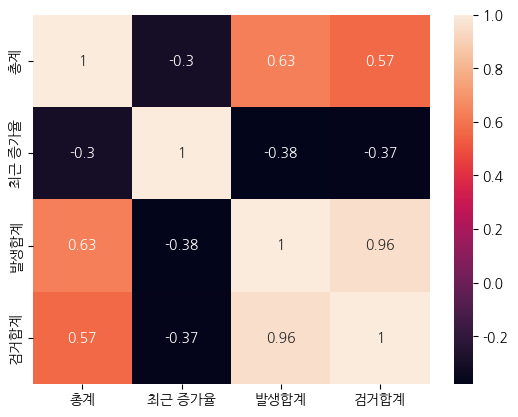

In [65]:
sns.heatmap(merged_crime_cctv2.corr(method="pearson"), annot=True)
plt.show()